# Generate a directed graph

In [114]:
! pip install networkx

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import time

point_num = 10
edge_num = 30
max_travel_time = 30 # (km)

points = []
paths = []

# fixed seed
random.seed(2)

# generate edges
for i in range(edge_num):
    point_1 = random.randint(0, point_num)
    point_2 = random.randint(0, point_num)
    while(point_1 == point_2):
        point_2 = random.randint(0, point_num)
    paths.append({
        'start': point_1,
        'dest': point_2,
        'travel_time': random.randint(0, max_travel_time)
        })


print(paths)



ModuleNotFoundError: No module named 'matplotlib'

In [116]:
# print path
list_start = [path['start']for path in paths]
list_sorted_position = np.argsort(list_start)
for i in list_sorted_position:
    print(paths[i])


{'start': 0, 'dest': 3, 'travel_time': 4}
{'start': 0, 'dest': 7, 'travel_time': 9}
{'start': 1, 'dest': 7, 'travel_time': 5}
{'start': 2, 'dest': 0, 'travel_time': 16}
{'start': 2, 'dest': 7, 'travel_time': 24}
{'start': 3, 'dest': 5, 'travel_time': 13}
{'start': 3, 'dest': 7, 'travel_time': 26}
{'start': 3, 'dest': 5, 'travel_time': 1}
{'start': 3, 'dest': 6, 'travel_time': 7}
{'start': 3, 'dest': 4, 'travel_time': 17}
{'start': 3, 'dest': 7, 'travel_time': 19}
{'start': 4, 'dest': 10, 'travel_time': 8}
{'start': 4, 'dest': 10, 'travel_time': 11}
{'start': 5, 'dest': 6, 'travel_time': 13}
{'start': 5, 'dest': 9, 'travel_time': 4}
{'start': 5, 'dest': 3, 'travel_time': 10}
{'start': 6, 'dest': 9, 'travel_time': 30}
{'start': 6, 'dest': 7, 'travel_time': 2}
{'start': 6, 'dest': 0, 'travel_time': 18}
{'start': 6, 'dest': 2, 'travel_time': 19}
{'start': 7, 'dest': 2, 'travel_time': 21}
{'start': 7, 'dest': 5, 'travel_time': 2}
{'start': 7, 'dest': 4, 'travel_time': 20}
{'start': 7, 'dest

In [117]:
def draw_curved_edges(G, pos, arc_rad=0.25):
    ax = plt.gca()
    for u, v, data in G.edges(data=True):
        if G.has_edge(v, u) and u != v:  # Two-way connection
            rad = arc_rad
        else:
            rad = 0.0
        # Create a curved line between nodes
        arrow = patches.FancyArrowPatch(
            pos[u], pos[v],
            connectionstyle=f'arc3,rad={rad}',
            arrowstyle='-|>',
            color='black',
            lw=1,
            mutation_scale=10,
        )
        ax.add_patch(arrow)

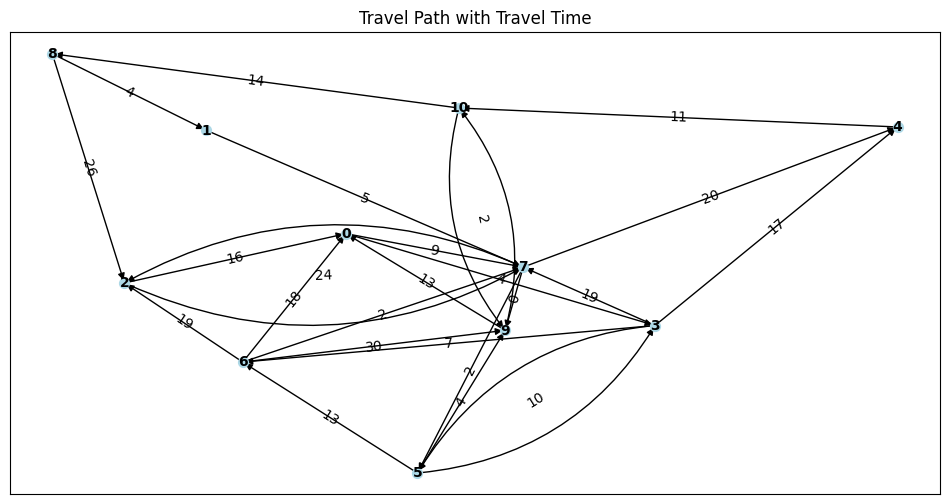

In [118]:
#import matplotlib.pyplot as plt
#import networkx as nx
# Given list of dictionaries
#edges = [{'start': 9, 'dest': 0, 'travel_time': 13}, {'start': 0, 'dest': 1, 'travel_time': 0}]

plt.figure(figsize=(12, 6))
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph and store travel time as an attribute
for i in range(len(paths)):
    G.add_edge(paths[i]['start'], paths[i]['dest'], travel_time=paths[i]['travel_time'])

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
#nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_nodes(G, pos,node_color='lightblue', node_size=50)

# Draw edge labels (travel time)
edge_labels = {(path['start'], path['dest']): path['travel_time'] for path in paths}
node_labels = { path['start']: path['start'] for path in paths}

nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)
#nx.draw_networkx_edges(G, pos, arrows=True)
draw_curved_edges(G, pos)


# Display the graph
plt.title("Travel Path with Travel Time")
plt.show()


# Algorithm 1: Brute force

In [119]:
def getDestList(paths, start, total_time = 0):
    destinations = []
    for i in range(len(paths)):
        if (paths[i]['start'] == start):
            destinations.append({
                                  'dest': paths[i]['dest'],
                                  'travel_time': paths[i]['travel_time'],
                                  'total_time': total_time + paths[i]['travel_time'],
                                  'stop': False
                                  })
#    print(destinations)
    return destinations


In [120]:
print(getDestList(paths,0,0))

[{'dest': 3, 'travel_time': 4, 'total_time': 4, 'stop': False}, {'dest': 7, 'travel_time': 9, 'total_time': 9, 'stop': False}]


In [121]:

def bruteForce(paths, start, dest, total_time = 0, history = {}):
#    print(history)
#    print(start)
    if (start in history):
#        print('looped')
        return []
    histories = []
    destinations = getDestList(paths, start, total_time)
#    print(np.asarray(destinations))
    for each_dest in destinations:
        new_hist = history.copy()
        new_hist.update({start: total_time})
        if (dest in new_hist):
#            print('reached dest')
            return [new_hist]
        histories += bruteForce(paths, each_dest['dest'], dest, each_dest['total_time'], new_hist)

    return histories


print(bruteForce(paths, 1, 3), sep='\n')

[{1: 0, 7: 5, 9: 5, 0: 18, 3: 22}, {1: 0, 7: 5, 9: 5, 10: 7, 8: 21, 2: 47, 0: 63, 3: 67}, {1: 0, 7: 5, 4: 25, 10: 33, 8: 47, 2: 73, 0: 89, 3: 93}, {1: 0, 7: 5, 4: 25, 10: 33, 9: 43, 0: 56, 3: 60}, {1: 0, 7: 5, 4: 25, 10: 36, 8: 50, 2: 76, 0: 92, 3: 96}, {1: 0, 7: 5, 4: 25, 10: 36, 9: 46, 0: 59, 3: 63}, {1: 0, 7: 5, 5: 7, 6: 20, 2: 39, 0: 55, 3: 59}, {1: 0, 7: 5, 5: 7, 6: 20, 0: 38, 3: 42}, {1: 0, 7: 5, 5: 7, 6: 20, 9: 50, 0: 63, 3: 67}, {1: 0, 7: 5, 5: 7, 6: 20, 9: 50, 10: 52, 8: 66, 2: 92, 0: 108, 3: 112}, {1: 0, 7: 5, 5: 7, 3: 17}, {1: 0, 7: 5, 5: 7, 9: 11, 0: 24, 3: 28}, {1: 0, 7: 5, 5: 7, 9: 11, 10: 13, 8: 27, 2: 53, 0: 69, 3: 73}, {1: 0, 7: 5, 2: 26, 0: 42, 3: 46}]


In [138]:
def findShortestPathByBruteForce(paths,start,dest):
  listTravelTime = []
  listResultPaths = bruteForce(paths,start,dest)
  for items in listResultPaths:
    listTravelTime.append(list(items.values())[-1])
  if len(listTravelTime) != 0 :
   resultPath = listResultPaths[np.argmin(listTravelTime)]
  else :
    return {'path':[],'total_time':None}
  return {'path':[key for key in resultPath.keys()],'total_time':min(listTravelTime)}

start_time = time.time()
print(findShortestPathByBruteForce(paths,1,3))
print('_____________________________________________')
print("Execution Time: %s seconds" % (time.time() - start_time))

{'path': [], 'total_time': None}
_____________________________________________
Execution Time: 0.0023183822631835938 seconds


# Algorithm 2: Dijkstra


In [135]:
def dijkstra(paths, start, dest):
    # Step 1: Create a graph as an adjacency list
    graph = {}
    for path in paths:
        if path['start'] not in graph:
            graph[path['start']] = []
        graph[path['start']].append((path['dest'], path['travel_time']))

    # Step 2: Initialize data structures
    unvisited_nodes = {node: float('inf') for node in graph}  # Set all nodes' distances to infinity
    unvisited_nodes[start] = 0  # Start node has a distance of zero
    visited_nodes = {}  # Track visited nodes and shortest path times
    previous_nodes = {}  # Track the path taken to each node

    # Step 3: Loop until we visit all reachable nodes or find the destination
    while unvisited_nodes:
        # Select the node with the smallest known distance
        current_node = min(unvisited_nodes, key=unvisited_nodes.get)
        current_distance = unvisited_nodes[current_node]

        # If we reach the destination node, stop and construct the path
        if current_node == dest:
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = previous_nodes.get(current_node)
            return {'path': path, 'total_time': current_distance}

        # Update the distances to each neighbor of the current node
        for neighbor, travel_time in graph.get(current_node, []):
            if neighbor in visited_nodes:
                continue  # Skip visited neighbors
            new_distance = current_distance + travel_time
            # If a shorter path to the neighbor is found, update the distance and path
            if new_distance < unvisited_nodes.get(neighbor, float('inf')):
                unvisited_nodes[neighbor] = new_distance
                previous_nodes[neighbor] = current_node

        # Mark the current node as visited
        visited_nodes[current_node] = current_distance
        unvisited_nodes.pop(current_node)

    # If we exit the loop without reaching the destination, return no path
    return {'path': [], 'total_time': float('inf')}

In [136]:
start_time = time.time()
print(dijkstra(paths, 1, 3))
print('_____________________________________________')
print("Execution Time: %s seconds" % (time.time() - start_time))

{'path': [], 'total_time': inf}
_____________________________________________
Execution Time: 0.0017015933990478516 seconds


# Algorithm 3: Bellman Ford

In [125]:
def bellman_ford(paths, start, dest):
    # Step 1: Initialize distances from start to all other nodes as infinity
    distances = {}
    previous_nodes = {}
    for path in paths:
        distances[path['start']] = float('inf')
        distances[path['dest']] = float('inf')
    distances[start] = 0

    # Step 2: Relax edges V-1 times
    for _ in range(len(distances) - 1):
        for path in paths:
            u, v, weight = path['start'], path['dest'], path['travel_time']
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                previous_nodes[v] = u

    # Step 3: Reconstruct the shortest path from start to dest
    path = []
    current = dest
    while current in previous_nodes:
        path.insert(0, current)
        current = previous_nodes[current]
    if path:
        path.insert(0, start)

    return {
        'path': path if distances[dest] != float('inf') else [],
        'total_time': distances[dest] if distances[dest] != float('inf') else None
    }


In [137]:
start_time = time.time()
print(bellman_ford(paths, 1, 3))
print('_____________________________________________')
print("Execution Time: %s seconds" % (time.time() - start_time))

{'path': [], 'total_time': None}
_____________________________________________
Execution Time: 0.0018138885498046875 seconds


In [127]:
#
#     CODE IN TEST
#
#def getPath(paths, start, dest):
#    for i in paths:
#        if (i['start'] == start) and (i['dest'] == dest):
            #print(i)
#            return i
#    return None

#def FloydWarshall(paths):
#    all_path_time = [[0] * 4] * 4
#    for k in range(1, 4 + 1):
#        for i in range(1, 4 + 1):
#            for j in range(1, 4 + 1):
#                path_i_j = getPath(paths, i, j)
#                path_i_k = getPath(paths, i, k)
#                path_k_j = getPath(paths, k, j)
#                if (path_i_j != None and path_i_k != None and path_k_j != None):
#                    #print(i)
#                    temp = all_path_time[i-1][j-1] + min(
#                        path_i_j['travel_time'],
#                        path_i_k['travel_time'] + path_k_j['travel_time']
#                        )
#                    all_path_time[i-1][j-1] = min(temp, all_path_time[i-1][j-1])
#    return all_path_time
#
#print(*FloydWarshall(paths_FloydWarshall_example), sep='\n')

In [128]:
#import requests

#URL = 'https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point=52.41092%2C4.84239&unit=KMPH&openLr=false&key=AdIZYsAK6AH2VDGDmLqDhLRU8xc4Z86k'
#lat = "10.7705100"
#lon = "106.6608836"
#URL_1 = 'https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point='+  +'&unit=KMPH&openLr=false&key=AdIZYsAK6AH2VDGDmLqDhLRU8xc4Z86k'
#response = requests.get("http://www.google.com")
#response = requests.get(URL)
#print(response.content)
#print(response.content == response.text)